<a href="https://colab.research.google.com/github/himanshugoyal77/student_classifier/blob/main/student_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df = pd.read_csv("/content/StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df_gender = df['gender'].value_counts()
df_gender

female    518
male      482
Name: gender, dtype: int64

In [ ]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
df["test preparation course"].unique()

array(['none', 'completed'], dtype=object)

In [ ]:
mask = {
    'none': 0,
    'completed': 1
}
df['test preparation course'] = df['test preparation course'].map(mask)
df['gender'] = df['gender'].map({'male': 0, 'female': 1})


In [ ]:

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,group B,bachelor's degree,standard,0,72,72,74
1,1,group C,some college,standard,1,69,90,88
2,1,group B,master's degree,standard,0,90,95,93
3,0,group A,associate's degree,free/reduced,0,47,57,44
4,0,group C,some college,standard,0,76,78,75


In [ ]:
df["test preparation course"].value_counts()

0    642
1    358
Name: test preparation course, dtype: int64

In [ ]:
avg = (df["math score"] + df["reading score"] + df["writing score"]) / 3
df["avg"] = avg

In [ ]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg
995,1,group E,master's degree,standard,1,88,99,95,94.000000
996,0,group C,high school,free/reduced,0,62,55,55,57.333333
997,1,group C,high school,free/reduced,1,59,71,65,65.000000
998,1,group D,some college,standard,1,68,78,77,74.333333
999,1,group D,some college,free/reduced,0,77,86,86,83.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df["avg"].describe()

count    1000.000000
mean       67.770667
std        14.257326
min         9.000000
25%        58.333333
50%        68.333333
75%        77.666667
max       100.000000
Name: avg, dtype: float64

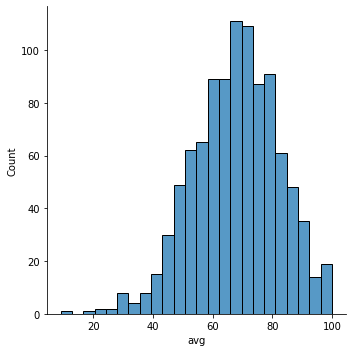

In [ ]:
sns.displot(df["avg"]);

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
gender,1000.0,0.518000,0.499926,0.0,0.000000,1.000000,1.000000,1.0
test preparation course,1000.0,0.358000,0.479652,0.0,0.000000,0.000000,1.000000,1.0
math score,1000.0,66.089000,15.163080,0.0,57.000000,66.000000,77.000000,100.0
reading score,1000.0,69.169000,14.600192,17.0,59.000000,70.000000,79.000000,100.0
writing score,1000.0,68.054000,15.195657,10.0,57.750000,69.000000,79.000000,100.0
avg,1000.0,67.770667,14.257326,9.0,58.333333,68.333333,77.666667,100.0


In [ ]:
df.corr()

,gender,test preparation course,math score,reading score,writing score,avg
gender,1.000000,-0.006028,-0.167982,0.244313,0.301225,0.130861
test preparation course,-0.006028,1.000000,0.177702,0.241780,0.312946,0.256710
math score,-0.167982,0.177702,1.000000,0.817580,0.802642,0.918746
reading score,0.244313,0.241780,0.817580,1.000000,0.954598,0.970331
writing score,0.301225,0.312946,0.802642,0.954598,1.000000,0.965667
avg,0.130861,0.256710,0.918746,0.970331,0.965667,1.000000


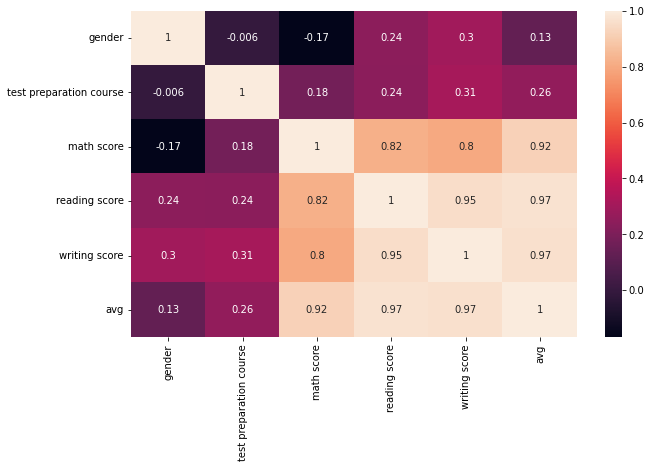

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True);

In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg
0,1,group B,bachelor's degree,standard,0,72,72,74,72.666667
1,1,group C,some college,standard,1,69,90,88,82.333333
2,1,group B,master's degree,standard,0,90,95,93,92.666667
3,0,group A,associate's degree,free/reduced,0,47,57,44,49.333333
4,0,group C,some college,standard,0,76,78,75,76.333333


In [ ]:
df["res"] = df["avg"] > 40

In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg,res
0,1,group B,bachelor's degree,standard,0,72,72,74,72.666667,True
1,1,group C,some college,standard,1,69,90,88,82.333333,True
2,1,group B,master's degree,standard,0,90,95,93,92.666667,True
3,0,group A,associate's degree,free/reduced,0,47,57,44,49.333333,True
4,0,group C,some college,standard,0,76,78,75,76.333333,True


In [ ]:
df["res"] = df["res"].map({
    True: 1,
    False: 0
})
df["res"]

0      1
1      1
2      1
3      1
4      1
      ..
995    1
996    1
997    1
998    1
999    1
Name: res, Length: 1000, dtype: int64

In [ ]:
df["res"].value_counts()

1    968
0     32
Name: res, dtype: int64

In [ ]:
features = ["gender"  ,"test preparation course" ,"math score" ,"math score" ,"writing score"]
X = df[features].copy()
len(X)

1000

In [ ]:
y = df["res"]
y.head(20)


0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    0
18    1
19    1
Name: res, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [ ]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
len(X_train), len(X_test)

(670, 330)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
prediction

array([1.0477448 , 0.94141162, 1.03178549, 1.02771236, 1.03367936,
       1.0529467 , 0.96537093, 0.90610796, 1.04041252, 0.87011496,
       0.9122567 , 0.80409071, 0.98523739, 0.91958898, 1.05816204,
       0.98609398, 0.89886592, 0.90797371, 0.8951063 , 0.93485893,
       1.02058867, 0.8659795 , 0.92158777, 0.84378102, 1.03207109,
       1.04839281, 1.00067459, 0.87528245, 0.81170859, 0.91626751,
       0.95977976, 0.98776457, 0.9564583 , 1.02685576, 1.03339376,
       0.89473047, 1.03140966, 0.99738104, 0.99234638, 0.68980516,
       1.02789303, 0.95711973, 0.97951338, 0.94567992, 1.05407421,
       0.95544915, 1.01442651, 0.79197497, 1.05312738, 0.98845392,
       0.99108603, 0.98125448, 1.0275172 , 0.88542752, 0.98409518,
       0.98741665, 1.07818104, 0.93824271, 1.04373398, 1.04395727,
       0.87059572, 1.01009589, 1.01881315, 0.94728818, 1.07353692,
       0.98400495, 0.95355527, 0.93947515, 0.94757379, 1.05326022,
       0.96499509, 1.05534925, 0.94488564, 0.88819247, 0.93804

In [ ]:
prediction[33]

1.026855760121287

In [ ]:
y_test

521    1
737    1
740    1
660    1
411    1
      ..
506    1
342    1
485    1
711    1
133    1
Name: res, Length: 330, dtype: int64

In [ ]:
np_y_test = np.array(y_test)
np_y_test[
          ]

1

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
mean_absolute_error(y_test, prediction)

0.08762690555711862

In [ ]:
print("Mean Absolute Error: ", mean_absolute_error(y_test, prediction))

Mean Absolute Error:  0.08762690555711862


In [ ]:
mean_squared_error(y_test, prediction)

0.03635858426890446

In [ ]:
print("Root mean square error : ", np.sqrt(mean_squared_error(y_test, prediction)))

Root mean square error :  0.1906792706848452


In [ ]:
for ind in range(20):
  np_y_test = np.array(y_test)
  actual = np_y_test[ind]
  pred = round(prediction[ind], 2)
  diff = round(actual - pred, 2)
  prec = round(diff/actual * 100, 2)
  print("Actual : " + str(actual))
  print("Prediction : " +  str(pred))
  print("Error : " + str(diff))
  print("Error % : " + str(prec))
  print("   ")

Actual : 1
Prediction : 1.05
Error : -0.05
Error % : -5.0
   
Actual : 1
Prediction : 0.94
Error : 0.06
Error % : 6.0
   
Actual : 1
Prediction : 1.03
Error : -0.03
Error % : -3.0
   
Actual : 1
Prediction : 1.03
Error : -0.03
Error % : -3.0
   
Actual : 1
Prediction : 1.03
Error : -0.03
Error % : -3.0
   
Actual : 1
Prediction : 1.05
Error : -0.05
Error % : -5.0
   
Actual : 1
Prediction : 0.97
Error : 0.03
Error % : 3.0
   
Actual : 1
Prediction : 0.91
Error : 0.09
Error % : 9.0
   
Actual : 1
Prediction : 1.04
Error : -0.04
Error % : -4.0
   
Actual : 1
Prediction : 0.87
Error : 0.13
Error % : 13.0
   
Actual : 1
Prediction : 0.91
Error : 0.09
Error % : 9.0
   
Actual : 0
Prediction : 0.8
Error : -0.8
Error % : -inf
   
Actual : 1
Prediction : 0.99
Error : 0.01
Error % : 1.0
   
Actual : 1
Prediction : 0.92
Error : 0.08
Error % : 8.0
   
Actual : 1
Prediction : 1.06
Error : -0.06
Error % : -6.0
   
Actual : 1
Prediction : 0.99
Error : 0.01
Error % : 1.0
   
Actual : 1
Prediction : 0

<ipython-input-191-02a0f28b19df>:6: RuntimeWarning: divide by zero encountered in double_scalars
  prec = round(diff/actual * 100, 2)


end

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
 clf_entropy = DecisionTreeClassifier(
            criterion = "entropy", random_state = 100,
            max_depth = 3, min_samples_leaf = 5)

In [ ]:
 clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [ ]:
y_pred = clf_entropy.predict(X_test)

In [ ]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,

In [ ]:
y_test

521    1
737    1
740    1
660    1
411    1
      ..
506    1
342    1
485    1
711    1
133    1
Name: res, Length: 330, dtype: int64

In [ ]:
np_y_test[17]

1

In [ ]:
confusion_matrix(y_test, y_pred)

array([[ 14,   2],
       [  1, 313]])

In [ ]:
accuracy_score(y_test,y_pred)*100

99.0909090909091

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90        16
           1       0.99      1.00      1.00       314

    accuracy                           0.99       330
   macro avg       0.96      0.94      0.95       330
weighted avg       0.99      0.99      0.99       330

